# Limpieza de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Esto nos sirve para visualizar como lo veriamos en Excel

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
DATA_ROOT = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition'
# DATA_ROOT = '.'

In [ ]:
invoices = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/invoices.csv')

In [ ]:
invoices.head()
invoices.dtypes
invoices['Type of Meal'].value_counts()
invoices.dtypes

Order Id              object
Date                  object
Meal Id               object
Company Id            object
Date of Meal          object
Participants          object
Meal Price           float64
Type of Meal          object
Heroes Adjustment       bool
dtype: object

## Tipo de datos y conversiones
## Hay 7 tipos de datos: -

objeto: este tipo de datos se utiliza para cadenas (es decir, secuencias de caracteres)

int64 : Usado para números enteros (números enteros, sin decimales)

float64 : Usado para números de coma flotante (es decir, cifras con decimales/fracciones)

bool : Usado para valores que solo pueden ser Verdadero/Falso

datetime64 : Usado para valores de fecha y hora

timedelta : se utiliza para representar la diferencia entre fechas y horas

categoría: se usa para valores que toman uno de un número limitado de opciones disponibles (las categorías no tienen que hacerlo, pero pueden tener un orden explícito)

## Convertir tipos de datos

Hay dos formas estándar de convertir tipos de datos de pandas:
.astype( )
funciones auxiliares de conversión, como pd.to_numeric o pd.to_datetime

In [ ]:
invoices['Date'] = invoices['Date'].astype('datetime64')
invoices['Type of Meal'] = invoices['Type of Meal'].astype('category')
invoices['Meal Price'] = invoices['Meal Price'].astype('int64')
invoices.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                    int64
Type of Meal               category
Heroes Adjustment              bool
dtype: object

In [ ]:
invoices.select_dtypes(include = 'category').head()

Type of Meal
0    Breakfast
1       Dinner
2        Lunch
3       Dinner
4        Lunch

## Funciones auxiliares de conversión, como pd.to_numeric o pd.to_datetime
Hay tres funciones pd.to_, pero para mí, solo dos de ellas aparecen con frecuencia:
pd.to_numeric()
pd.to_datetime()
pd.to_timedelta()

In [ ]:
invoices.loc[45612,'Meal Price'] = 'I am here'
invoices.loc[45620,'Meal Price'] = 'Me too'

In [ ]:
invoices['Meal Price'].apply(lambda x:type(x)).value_counts()

<class 'int'>    50015
<class 'str'>        2
Name: Meal Price, dtype: int64

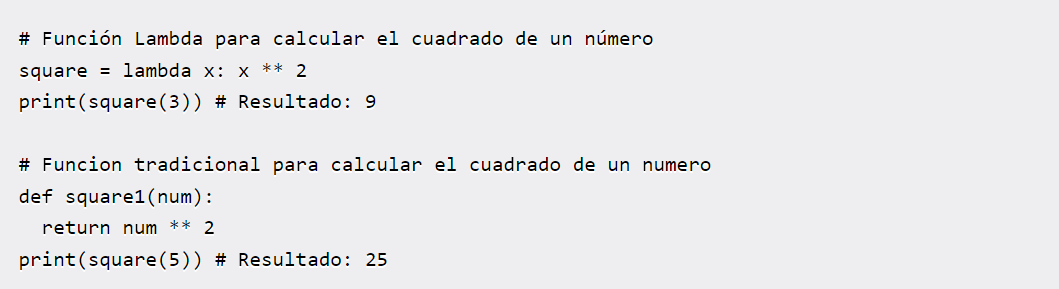

In [ ]:
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'],errors = 'coerce')
invoices1 = invoices[invoices['Meal Price'].isnull()]
invoices1

Order Id       Date           Meal Id        Company Id  \
45612  SJA1F92KXWZDH398 2017-02-26  OOW0UEXQY5RMPPZ8  ICNGUMLKEB27T1P3   
45620  2DKPL6A229CN4WH3 2014-05-22  JH8G8O5LQEUF7U3W  OJKDXPQQXYUOGGJB   

                    Date of Meal                     Participants  Meal Price  \
45612  2017-03-02 20:00:00+01:00                 ['Betty Stroud']         NaN   
45620  2014-05-20 20:00:00+02:00  ['Alex Ellis' 'Angela Aguirre']         NaN   

      Type of Meal  Heroes Adjustment  
45612       Dinner              False  
45620       Dinner              False

In [ ]:
invoices['Meal Price']=invoices['Meal Price'].fillna(invoices['Meal Price'].median())
invoices['Meal Price'].astype(int)

0        469
1         22
2        314
3        438
4        690
        ... 
50012      9
50013     25
50014    160
50015    497
50016    365
Name: Meal Price, Length: 50017, dtype: int64

## Manejo de pd.to_datetime(). 

In [ ]:
print(pd.to_datetime('2019-8-1'))
print(pd.to_datetime('Aug, 1 2019'))
print(pd.to_datetime('20190108'))

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-01-08 00:00:00


In [ ]:
pd.to_datetime('20190108',format = '%Y%d%m')

Timestamp('2019-08-01 00:00:00')

In [ ]:
pd.to_datetime('yonn 20190108',format = '%Y%d%m',exact = False)

Timestamp('2019-08-01 00:00:00')

# Métodos de acceso útiles para ciertos tipos de datos
Hay tres accesorios diferentes: 
dt
str
cat

In [ ]:
invoices['Date'].dt.date

0        2016-05-27
1        2018-09-27
2        2014-08-24
3        2014-04-12
4        2015-07-28
            ...    
50012    2017-09-20
50013    2018-03-19
50014    2017-09-21
50015    2018-01-28
50016    2017-09-06
Name: Date, Length: 50017, dtype: object

In [ ]:
invoices['Date'].dt.year

0        2016
1        2018
2        2014
3        2014
4        2015
         ... 
50012    2017
50013    2018
50014    2017
50015    2018
50016    2017
Name: Date, Length: 50017, dtype: int64

In [ ]:
invoices['Date'].dt.day

0        27
1        27
2        24
3        12
4        28
         ..
50012    20
50013    19
50014    21
50015    28
50016     6
Name: Date, Length: 50017, dtype: int64

In [ ]:
invoices['Date'].dt.day_name()

0           Friday
1         Thursday
2           Sunday
3         Saturday
4          Tuesday
           ...    
50012    Wednesday
50013       Monday
50014     Thursday
50015       Sunday
50016    Wednesday
Name: Date, Length: 50017, dtype: object

In [ ]:
invoices['Date'].dt.month_name()

0              May
1        September
2           August
3            April
4             July
           ...    
50012    September
50013        March
50014    September
50015      January
50016    September
Name: Date, Length: 50017, dtype: object

In [ ]:
invoices['Date'].dt.days_in_month

0        31
1        30
2        31
3        30
4        31
         ..
50012    30
50013    31
50014    30
50015    31
50016    30
Name: Date, Length: 50017, dtype: int64

is_leap_year, is_month_start, is_month_end, is_quarter_start, is_quarter_end, is_year_start, is_year_end devuelve True or False

In [ ]:
invoices[invoices['Date'].dt.is_month_start]

Order Id       Date           Meal Id        Company Id  \
143    OXX1WA2USIYH69SU 2018-09-01  FX68L7JKDE58ZKS1  PQ79N68UEQ9FFCPU   
217    X546I8JFNVJFE7FH 2017-10-01  G2UDNGRTBYGIS90Z  MR6NETSKD2PSN54L   
223    2UDNOCM41XE38JXR 2014-10-01  4RRVQGEPPDEDYPIZ  MR6NETSKD2PSN54L   
239    SS6TLV5CW0888BC4 2015-12-01  RZK62CIZ31ZJ5B0K  PYAQ341Y4240ACP4   
265    ASDP640M48CTNWCV 2016-02-01  0FBMPOWAQ9SQHOIS  4VVOCC6ELGQAOZ7T   
...                 ...        ...               ...               ...   
49903  6OGZBDGSOO1BIHC9 2014-09-01  5DO61RK0BX3Y3Y4C  PLGXGQY1FMR95OBC   
49914  8F0VTBD1UBIT8IWL 2017-12-01  2FSMDV5KMJ0USX4H  8YOY0UK6SVPKGWDV   
49931  P3D63IBCXDVSBMGE 2017-09-01  CY5W155NLXY6V9CU  DNAC0XNVYCD3J62R   
49960  HIHM2Y93IZTCLXZZ 2017-01-01  18JH0E28KFW0BZ7O  41AQ4K1NC4FVCGKJ   
49999  JOPTZ9VYV1RWPTW7 2018-02-01  I5EXQPTV5PK8PC3C  5K17HYJQ6JG6UFU0   

                    Date of Meal  \
143    2018-09-02 14:00:00+02:00   
217    2017-09-26 07:00:00+02:00   
223    2014-10-01 08:00:00+02:00   
239    2015-11-29 12:00:00+01:00   
265    2016-02-02 07:00:00+01:00   
...                          ...   
49903  2014-08-29 14:00:00+02:00   
49914  2017-11-28 21:00:00+01:00   
49931  2017-09-05 09:00:00+02:00   
49960  2017-01-02 14:00:00+01:00   
49999  2018-01-29 13:00:00+01:00   

                                            Participants  Meal Price  \
143                       ['Monica Espinoza' 'Ann Vitt']       124.0   
217       ['Martin Riley' 'Jane Bruce' 'Rosa Parramore']       409.0   
223                   ['Martin Riley' 'Earl Sorrentino']       311.0   
239                                      ['Ron Pignone']       253.0   
265    ['Edward Young' 'Clifford Hardman' 'David Leun...       111.0   
...                                                  ...         ...   
49903                              ['Theodore Garrison']       101.0   
49914                 ['Justin East' 'Hortense Strauss']       610.0   
49931                                    ['Robyn Price']       459.0   
49960                  ['Samuel Blum' 'Kenneth Desilva']       593.0   
49999                                ['Arleen Williams']       563.0   

      Type of Meal  Heroes Adjustment  
143          Lunch              False  
217      Breakfast              False  
223      Breakfast              False  
239          Lunch              False  
265      Breakfast              False  
...            ...                ...  
49903        Lunch              False  
49914       Dinner              False  
49931    Breakfast              False  
49960        Lunch              False  
49999        Lunch              False  

[1752 rows x 9 columns]

Los períodos disponibles son W, M, Q e Y, lo que convierte las fechas en períodos

In [ ]:
invoices['Date'].dt.to_period('W')

0        2016-05-23/2016-05-29
1        2018-09-24/2018-09-30
2        2014-08-18/2014-08-24
3        2014-04-07/2014-04-13
4        2015-07-27/2015-08-02
                 ...          
50012    2017-09-18/2017-09-24
50013    2018-03-19/2018-03-25
50014    2017-09-18/2017-09-24
50015    2018-01-22/2018-01-28
50016    2017-09-04/2017-09-10
Name: Date, Length: 50017, dtype: period[W-SUN]

## Accesorio — str
lower() / upper()/ title() para administrar las mayúsculas de las cadenas

In [ ]:
invoices['Type of Meal'].str.title()

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
50012    Breakfast
50013    Breakfast
50014       Dinner
50015       Dinner
50016        Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.ljust(width = 15)

0        Breakfast      
1        Dinner         
2        Lunch          
3        Dinner         
4        Lunch          
              ...       
50012    Breakfast      
50013    Breakfast      
50014    Dinner         
50015    Dinner         
50016    Lunch          
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.rjust(width = 15)

0              Breakfast
1                 Dinner
2                  Lunch
3                 Dinner
4                  Lunch
              ...       
50012          Breakfast
50013          Breakfast
50014             Dinner
50015             Dinner
50016              Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.center(width = 15)

0           Breakfast   
1             Dinner    
2             Lunch     
3             Dinner    
4             Lunch     
              ...       
50012       Breakfast   
50013       Breakfast   
50014         Dinner    
50015         Dinner    
50016         Lunch     
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.zfill(width = 15)

0        000000Breakfast
1        000000000Dinner
2        0000000000Lunch
3        000000000Dinner
4        0000000000Lunch
              ...       
50012    000000Breakfast
50013    000000Breakfast
50014    000000000Dinner
50015    000000000Dinner
50016    0000000000Lunch
Name: Type of Meal, Length: 50017, dtype: object

startswith(), endswith(), contains() comprueba la presencia de una subcadena

In [ ]:
invoices[invoices['Type of Meal'].str.endswith('ast')]

Order Id       Date           Meal Id        Company Id  \
0      839FKFW2LLX4LMBB 2016-05-27  INBUX904GIHI8YBD  LJKS5NK6788CYMUU   
7      FM608JK1N01BPUQN 2014-05-08  E8WJZ1FOSKZD2MJN  36MFTZOYMTAJP1RK   
11     8RIGCF74GUEQHQEE 2018-07-23  5XK0KTFTD6OAP9ZP  36MFTZOYMTAJP1RK   
12     TH60C9D8TPYS7DGG 2016-12-15  KDSMP2VJ22HNEPYF  36MFTZOYMTAJP1RK   
17     KNF3E3QTOQ22J269 2018-06-20  737T2U7604ABDFDF  36MFTZOYMTAJP1RK   
...                 ...        ...               ...               ...   
50008  UHIE76EGIC2KFP34 2016-08-06  BFLY4LHHUI5OIREM  FC1LJXHNH2883N3Y   
50009  FWH3N8N5ARW53BE6 2016-03-17  WHVI4J3J388I8I4B  FC1LJXHNH2883N3Y   
50011  81J2RM0YM63VAT0K 2018-06-03  HNXSJZQ120WGAWZP  E4K99D4JR9E40VE1   
50012  4OMS8ZSA0UX8LHWI 2017-09-20  1TD5MROATV1NHZ4Y  E4K99D4JR9E40VE1   
50013  RR0VKJN8V0KHNKGG 2018-03-19  22EX9VZSJKHP4AIP  E4K99D4JR9E40VE1   

                    Date of Meal  \
0      2016-05-31 07:00:00+02:00   
7      2014-05-07 09:00:00+02:00   
11     2018-07-27 08:00:00+02:00   
12     2016-12-13 08:00:00+01:00   
17     2018-06-15 07:00:00+02:00   
...                          ...   
50008  2016-08-08 08:00:00+02:00   
50009  2016-03-12 09:00:00+01:00   
50011  2018-06-03 07:00:00+02:00   
50012  2017-09-21 08:00:00+02:00   
50013  2018-03-18 09:00:00+01:00   

                                            Participants  Meal Price  \
0                                       ['David Bishop']       469.0   
7      ['Amanda Knowles' 'Cheryl Feaster' 'Ginger Hoa...       320.0   
11                                    ['Amanda Knowles']       210.0   
12     ['Cheryl Feaster' 'Bret Adams' 'Ginger Hoagland']       755.0   
17     ['Glenn Gould' 'Cheryl Feaster' 'Ginger Hoagla...       475.0   
...                                                  ...         ...   
50008                                   ['Jerry Nelson']       164.0   
50009                        ['Jon Ponce' 'Alice Allen']       523.0   
50011                 ['Chester Mortimer' 'Robin Ramos']       598.0   
50012                                 ['Regina Shirley']         9.0   
50013                 ['Robin Ramos' 'Chester Mortimer']        25.0   

      Type of Meal  Heroes Adjustment  
0        Breakfast              False  
7        Breakfast              False  
11       Breakfast              False  
12       Breakfast              False  
17       Breakfast              False  
...            ...                ...  
50008    Breakfast              False  
50009    Breakfast              False  
50011    Breakfast              False  
50012    Breakfast              False  
50013    Breakfast              False  

[16663 rows x 9 columns]

swapcase(), repeat(times) 

In [ ]:
invoices['Type of Meal'].str.swapcase()

0        bREAKFAST
1           dINNER
2            lUNCH
3           dINNER
4            lUNCH
           ...    
50012    bREAKFAST
50013    bREAKFAST
50014       dINNER
50015       dINNER
50016        lUNCH
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.repeat(2)

0        BreakfastBreakfast
1              DinnerDinner
2                LunchLunch
3              DinnerDinner
4                LunchLunch
                ...        
50012    BreakfastBreakfast
50013    BreakfastBreakfast
50014          DinnerDinner
50015          DinnerDinner
50016            LunchLunch
Name: Type of Meal, Length: 50017, dtype: object

## Split() dividir columnas de texto

In [ ]:
!pip install faker

import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 18.9 MB/s 


In [ ]:
from faker import Faker as faker

faker = Faker()
faker.name()

df = []

for n in range(10):
    df.append({'Lat': faker.coordinate(center=74.0, radius=0.10),
               'Lon': faker.coordinate(center=40.8, radius=0.10),
               'Txt': faker.sentence(),
               'Nam': faker.name(),
               'Add': faker.address(),
               'Job': faker.job()
              })

df = pd.DataFrame(df)
df = df[['Nam', 'Job', 'Txt', 'Add', 'Lat', 'Lon']]
df

Nam                                    Job  \
0     Vanessa Levy                    Dispensing optician   
1    Ronald Gibson                         Radio producer   
2     Jill Carlson                    Chemist, analytical   
3       Becky Bell                  Theatre stage manager   
4   Spencer Duncan  Product/process development scientist   
5      Neil Taylor                   Biochemist, clinical   
6       Jose Smith                           Web designer   
7  Melanie Spencer                              Homeopath   
8     Sarah Wilson     Tourist information centre manager   
9   Stephanie King             Architectural technologist   

                                                 Txt  \
0          Result general performance other receive.   
1                            Those current tend bag.   
2                    Another camera dog design sort.   
3                             Attorney nice Mrs per.   
4         Ask scientist people why everyone society.   
5                     Animal just difficult serious.   
6    Two treat beautiful quickly expert environment.   
7  Easy tax time contain suffer wind daughter org...   
8                   Outside receive investment away.   
9          Often life health finally under together.   

                                                 Add        Lat        Lon  
0  4464 Matthew Greens Apt. 746\nWoodwardview, NE...  74.020790  40.894759  
1                   Unit 4372 Box 2295\nDPO AP 22541  74.093819  40.884916  
2            63226 Boone Way\nFergusonfurt, UT 68828  74.006669  40.782419  
3   32977 Nunez Hills Apt. 528\nAshleyfurt, OR 57128  73.943184  40.877583  
4  91780 Sanchez Turnpike Apt. 607\nEast Lisa, MI...  73.960896  40.866258  
5     2001 Heather Shoals\nWest Nancyburgh, NV 27475  74.018729  40.730894  
6                          USNS Taylor\nFPO AE 17347  74.070152  40.844952  
7         185 Mullen Motorway\nNorth Julia, LA 39148  74.026187  40.736019  
8           081 Denise Glens\nPort Richard, MI 26089  74.098372  40.894710  
9         455 Howell Junctions\nMartinview, KS 88106  74.094093  40.885964

In [ ]:
add = df["Add"].str.split(',',expand=True)
add.columns = ['Street', 'State']
df = pd.concat([df, add], axis=1)
df

Nam                                    Job  \
0     Vanessa Levy                    Dispensing optician   
1    Ronald Gibson                         Radio producer   
2     Jill Carlson                    Chemist, analytical   
3       Becky Bell                  Theatre stage manager   
4   Spencer Duncan  Product/process development scientist   
5      Neil Taylor                   Biochemist, clinical   
6       Jose Smith                           Web designer   
7  Melanie Spencer                              Homeopath   
8     Sarah Wilson     Tourist information centre manager   
9   Stephanie King             Architectural technologist   

                                                 Txt  \
0          Result general performance other receive.   
1                            Those current tend bag.   
2                    Another camera dog design sort.   
3                             Attorney nice Mrs per.   
4         Ask scientist people why everyone society.   
5                     Animal just difficult serious.   
6    Two treat beautiful quickly expert environment.   
7  Easy tax time contain suffer wind daughter org...   
8                   Outside receive investment away.   
9          Often life health finally under together.   

                                                 Add        Lat        Lon  \
0  4464 Matthew Greens Apt. 746\nWoodwardview, NE...  74.020790  40.894759   
1                   Unit 4372 Box 2295\nDPO AP 22541  74.093819  40.884916   
2            63226 Boone Way\nFergusonfurt, UT 68828  74.006669  40.782419   
3   32977 Nunez Hills Apt. 528\nAshleyfurt, OR 57128  73.943184  40.877583   
4  91780 Sanchez Turnpike Apt. 607\nEast Lisa, MI...  73.960896  40.866258   
5     2001 Heather Shoals\nWest Nancyburgh, NV 27475  74.018729  40.730894   
6                          USNS Taylor\nFPO AE 17347  74.070152  40.844952   
7         185 Mullen Motorway\nNorth Julia, LA 39148  74.026187  40.736019   
8           081 Denise Glens\nPort Richard, MI 26089  74.098372  40.894710   
9         455 Howell Junctions\nMartinview, KS 88106  74.094093  40.885964   

                                       Street      State  
0  4464 Matthew Greens Apt. 746\nWoodwardview   NE 94359  
1            Unit 4372 Box 2295\nDPO AP 22541       None  
2               63226 Boone Way\nFergusonfurt   UT 68828  
3      32977 Nunez Hills Apt. 528\nAshleyfurt   OR 57128  
4  91780 Sanchez Turnpike Apt. 607\nEast Lisa   MI 02343  
5        2001 Heather Shoals\nWest Nancyburgh   NV 27475  
6                   USNS Taylor\nFPO AE 17347       None  
7            185 Mullen Motorway\nNorth Julia   LA 39148  
8              081 Denise Glens\nPort Richard   MI 26089  
9            455 Howell Junctions\nMartinview   KS 88106

## Datos Faltantes

In [ ]:
## Nos dice que aqui el dato numero 2 de la serie es True al metodo .isnull, 
## esto quiere decir que su valor es una valor NaN(Not a number)

string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
# string_data.isnull()

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
## Cambiaremos el valor de aardvark a None(El objeto None de Python, denota falta de valor), 
## por ende al aplicarle el metodo .isnull, su valor se transforma en True

string_data[0] = None
string_data
# string_data.isnull()

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

### Filtrando datos faltantes

In [ ]:
## Importaremos nan del paquete de numpy, crea valores NaN
## De este modo hemos creado una serie nuevamente


from numpy import nan as NA
data = pd.Series([1, NA, 3.5, None, 7])
data
# data.dropna()

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
## El metodo .notnull(), filtra los datos que sean NaN y None

data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
## El metodo .dropna(), nos permite eliminar filas de un dataframe que tengan 
## valores NaN


data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data
# cleaned

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## El metodo .dropna() nos permite eliminar las filas, columnas que contienen valores
## NaN, asi mismo por sus parametros podemos definir si seran filas(0) o columnas(1)
## el parametro how = "any"(elimina cualquier fila que contenga almenos un valor NaN)
## el parametro how = "all"(elimina cualquier fila que contenga todos un valor NaN)

data.dropna(axis = 0, how="all")

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## Eliminamos columnas

data[4] = NA
data
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## Creamos un array con np.random.randn, una matriz de 7x3, que posteriormente convertiremos
## a un DataFrame, aplicaremos el dropna para eliminar los valores de las columnas

df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df
df.dropna()
#df.dropna(thresh=2)

0         1         2
4  0.372401 -0.111898  1.538831
5  0.387779  1.175840 -1.694432
6 -1.666179 -1.366806 -0.338518

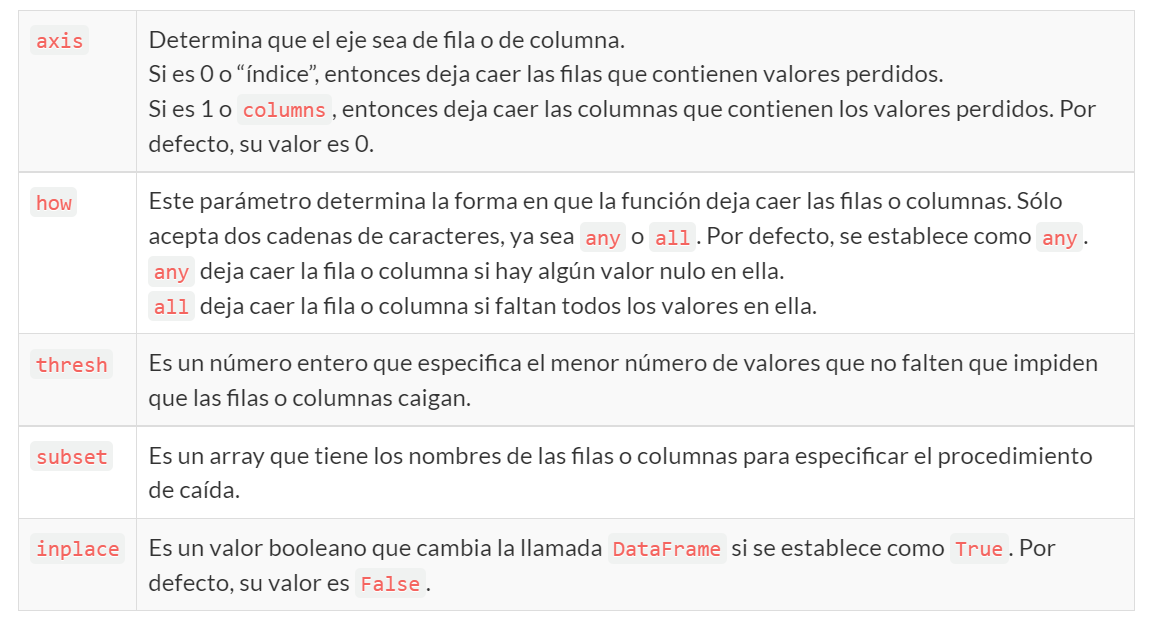

### Llenando datos faltantes

In [ ]:
## La función pandas.DataFrame.fillna() reemplaza los valores NaN en DataFrame con algún valor determinado.

df.fillna(43.5666)

0          1          2
0 -0.188224  43.566600  43.566600
1 -0.768408  43.566600  43.566600
2  2.307000  43.566600   0.176041
3 -1.097465  43.566600   0.427070
4 -0.079591  -0.887022  -0.136815
5  1.532128  -0.918000   1.204493
6 -0.339063   1.261802  -1.521774

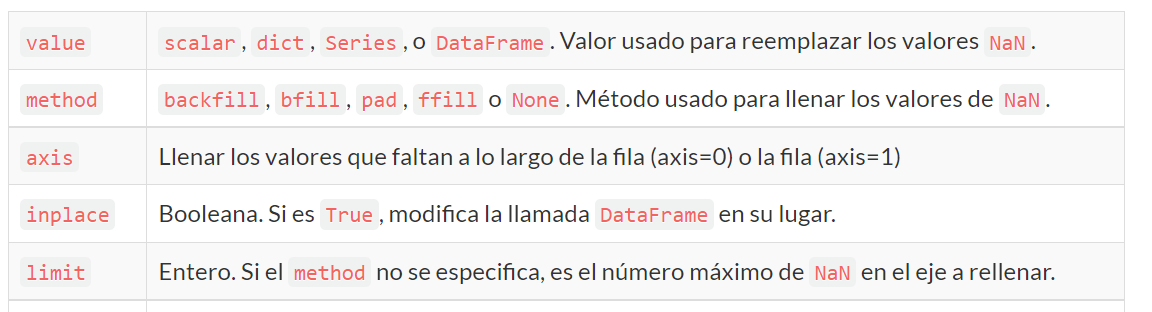

In [ ]:
## Podemos especificar a traves de un diccionario dentro del metodo fillna() valores
## especificos para cada columna, es decir aqui especificamos para la columna 1 un valor de 0.5
## para la columna 2 un valor de relleno de 0

df.fillna({1: 0.5, 2: 0})

0         1         2
0 -0.188224  0.500000  0.000000
1 -0.768408  0.500000  0.000000
2  2.307000  0.500000  0.176041
3 -1.097465  0.500000  0.427070
4 -0.079591 -0.887022 -0.136815
5  1.532128 -0.918000  1.204493
6 -0.339063  1.261802 -1.521774

In [ ]:
## El parametro inplace , nos permite especificar un valor True o False, para decir si se hara el rellenado
## en el mismo dataframe, eliminando el dataframe anterior


df.fillna(0, inplace=True)
df

0         1         2
0 -0.188224  0.000000  0.000000
1 -0.768408  0.000000  0.000000
2  2.307000  0.000000  0.176041
3 -1.097465  0.000000  0.427070
4 -0.079591 -0.887022 -0.136815
5  1.532128 -0.918000  1.204493
6 -0.339063  1.261802 -1.521774

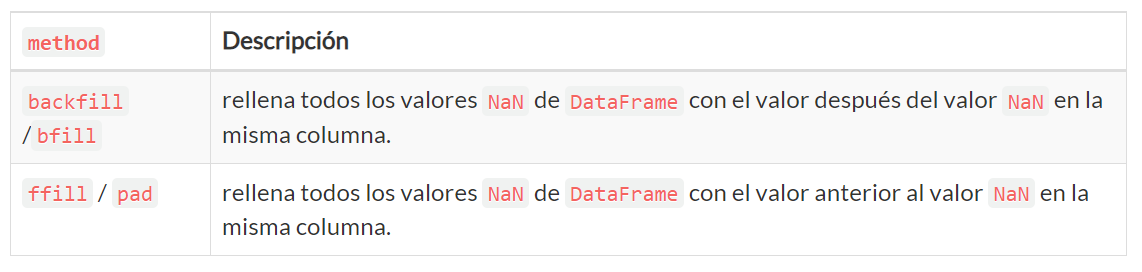

In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df
df.fillna(method='ffill')
df.fillna(method='ffill', limit=2)

0         1         2
0 -1.983420  0.350168  0.944604
1 -0.590683 -0.256197  0.129831
2 -1.081536 -0.256197 -0.473946
3  0.269018 -0.256197  0.660371
4  0.773672       NaN  0.660371
5 -0.048968       NaN  0.660371

In [ ]:
## En algunos casos va a ser necesario rellenar valores numericos, es adecuado hacerlo con la media,
## habra veces que sera necesario hacerlo con la mediana, pero depende de la distribucion de nuestros
## datos


data = pd.Series([1., NA, 3.5, NA, 7])
resultado_media = (1 + 3.5 + 7)/3
resultado_media
# data
# data.fillna(data.mean())

3.8333333333333335

## Datos Duplicados

### Quitando datos duplicados

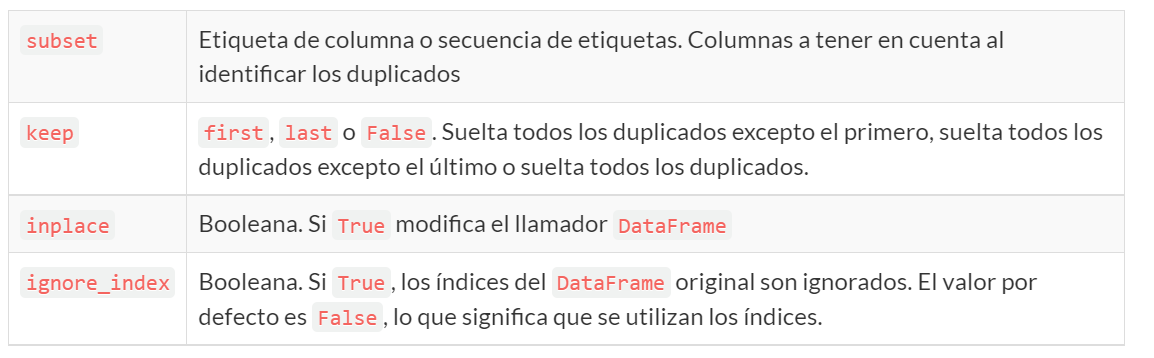

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4

In [ ]:
## El metodo .duplicated() nos retorna un True si es que dentro de nuestra data existen 
## valores que comparten en todas las columnas el mismo valor que en alguna otra fila

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
## .drop_duplicates(), aplica lo mismo que drop_na, en este caso elimina los valores repetidos

data.drop_duplicates()

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4

In [ ]:
## Crearemos una nueva columna, v1, aqui, la columna tendra valores del 0 al 6,
## utilizaremos el drop_duplicates(['k1']), que nos esta especificando, en que 
## columna actuara el drop_duplicates

data['v1'] = range(7)
data
#data.drop_duplicates(['k1'])

k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
6  two   4   6

In [ ]:
fruit_list = [ ('Orange', 34, 'Yes' ,'ABC') ,
             ('Mango', 24, 'No','XYZ' ) ,
             ('banana', 14, 'No','ABC' ) ,
            ('Orange', 34, 'Yes' ,'ABC') ]

df = pd.DataFrame(fruit_list, 
                  columns = ['Name',
                             'Price',
                             'In_Stock',
                             'Supplier'])

print("DataFrame:")
print(df)

df_unique=df.drop_duplicates(subset ="Supplier",keep="last") 

print("DataFrame with Unique vales of Supplier Column:")
print(df_unique)

DataFrame:
     Name  Price In_Stock Supplier
0  Orange     34      Yes      ABC
1   Mango     24       No      XYZ
2  banana     14       No      ABC
3  Orange     34      Yes      ABC
DataFrame with Unique vales of Supplier Column:
     Name  Price In_Stock Supplier
1   Mango     24       No      XYZ
3  Orange     34      Yes      ABC


## Remplazar valores

### Metodo `.replace()`

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Detectar y filtrar outliers

Un outlier, es un dato anomalo/excepcional dentro del rango de datos, es decir, que los outliers en nuestro dataset serán los valores que se escapan al rango en donde se concentran la mayoría de muestras

In [ ]:
#Descarguemos el dataset

info_rem = pd.read_csv('https://raw.githubusercontent.com/Juan199963/Python_Course/main/DataFrame_G17C.csv')
info_rem

In [ ]:
info_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CARGO                                372 non-null    object 
 1   EXPEDIENTE                           356 non-null    object 
 2   Lugar de Postulación (Convocatoria)  373 non-null    object 
 3   INDICACION DEL JURADO                367 non-null    object 
 4   FECHA DE SELECCIÓN                   372 non-null    object 
 5   APELLIDOS Y NOMBRES                  372 non-null    object 
 6   DNI                                  371 non-null    float64
 7   E-mail                               372 non-null    object 
 8   Teléfonos                            372 non-null    object 
 9   DISTRITO/ DIRECCION                  372 non-null    object 
 10  INTERNO/ EXTERNO                     366 non-null    object 
 11  Carta Oferta o felicitación     

In [ ]:
#Para este caso utilizaremos solo la columna REMUNERACION, para detectar algun outlier
info_rem['REMUNERACIÓN'].astype(float)

ValueError: ignored

In [ ]:
#Vemos que existen datos que tienen la palabra 'RESERVA'
#Veremos todos los datos que son diferentes a un tipo float o int, para este caso
#nos centraremos en la columna remuneracion

info_rem_filter = info_rem[info_rem['REMUNERACIÓN'] != 'RESERVA'] ##Creamos nuestro filtro
info_rem_filter


CARGO  EXPEDIENTE  \
0                                 ANALISTA DE CREDITOS  903 - 2021   
1                                 ANALISTA DE CREDITOS  903 - 2021   
2                                 ANALISTA DE CREDITOS  913 - 2021   
3                                 ANALISTA DE CREDITOS    921-2021   
4                                 ANALISTA DE CREDITOS    941-2021   
..                                                 ...         ...   
368                               ANALISTA DE CREDITOS  172 - 2022   
369                               ANALISTA DE CREDITOS         NaN   
370                               ANALISTA DE CREDITOS         NaN   
371                               ANALISTA DE CREDITOS         NaN   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         NaN   

    Lugar de Postulación (Convocatoria)  \
0                     ANTUNEZ DE MAYOLO   
1                     ANTUNEZ DE MAYOLO   
2                     ANTUNEZ DE MAYOLO   
3                                 TACNA   
4                     ANTUNEZ DE MAYOLO   
..                                  ...   
368                      ICA SAN MARTIN   
369                            LA OROYA   
370                            LA OROYA   
371                      CERRO DE PASCO   
372                            AREQUIPA   

                                 INDICACION DEL JURADO FECHA DE SELECCIÓN  \
0       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         02/12/2021   
1        ACCE AVANZADO EXPERTO – AG. ANTUNEZ DE MAYOLO         02/12/2021   
2       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         11/12/2021   
3                     AC AVANZADO SUPERIOR - AG. PINTO         16/12/2021   
4       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         15/12/2021   
..                                                 ...                ...   
368  ANALISTA DE CREDITOS EXPERTO - AG. ICA SAN MARTIN         09/03/2022   
369                                                NaN         10/03/2022   
370                                                NaN         10/03/2022   
371                                                NaN         11/01/2022   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         11/03/2022   

                            APELLIDOS Y NOMBRES         DNI  \
0               SARMIENTO MORALES, JORGE MANUEL  48126082.0   
1                   LOYOLA JORGE, MARISA ANGELA  70336326.0   
2                    PECEROS ZAVALA, RUTH PAOLA  45942433.0   
3                         Dante Rojas Huanacuni  41432183.0   
4                  URBANO IVARROLA, JOSE DANIEL  47691837.0   
..                                          ...         ...   
368  SALGADO DIAZ VDA. DE RAFFO, AURORA SUSANAO  21574610.0   
369                 Ruben Paul Basaldua Papuico  72858626.0   
370               Jovino Rosendo Contreras Soto  40852380.0   
371                Walter Orlando Zevallos Luis  71922476.0   
372               CALDAS CHIRINOS, RENZO ADRIAN  72672599.0   

                                 E-mail   Teléfonos DISTRITO/ DIRECCION  \
0                   jmsm_21@hotmail.com   987181405          LIMA NORTE   
1                    mari92lj@gmail.com   955705511          LIMA NORTE   
2                    pola3603@gmail.com  993085 362          LIMA NORTE   
3                   edrh_20@hotmail.com   952953290               TACNA   
4                d.urbano1404@gmail.com   997422069          LIMA NORTE   
..                                  ...         ...                 ...   
368           aurosalgado26@hotmail.com   945575364      ICA SAN MARTIN   
369  basalduapapuicorubenpaul@gmail.com   936060147            LA OROYA   
370               jovino_cs@hotmail.com   965333754            LA OROYA   
371               wzx_14_10@hotmail.com   925142158      CERRO DE PASCO   
372           renzo.caldas.ch@gmail.com   925185682            AREQUIPA   

    INTERNO/ EXTERNO Carta Oferta o felicitación FECHA DE INGRESO  \
0            EXTERNO                   

In [ ]:
info_rem_filter.dropna(inplace=True)
info_rem_filter['REMUNERACIÓN'].astype(int)
#Aqui obtuvimos la columna con valores que ya son float64


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0      2000
1      1700
2      2000
3      2000
4      2000
       ... 
362    1700
365    1400
366    5500
367    1400
368    2400
Name: REMUNERACIÓN, Length: 265, dtype: int64

In [ ]:
info_rem_filter2 = info_rem_filter[info_rem_filter['REMUNERACIÓN'] != 'NaN']

info_rem_filter2['REMUNERACIÓN'].value_counts()

930      67
1400     55
1700     39
2000     38
2400     36
2900     14
3500      3
1100      3
4000      2
6500      1
1800      1
3000      1
1300      1
29000     1
20000     1
1500      1
5500      1
Name: REMUNERACIÓN, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7fa58eb98f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa58ebb2090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa58ebbc0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa58ebb2b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa58eba85d0>,
  <matplotlib.lines.Line2D at 0x7fa58eba8b10>]}

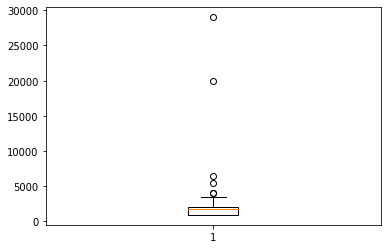

In [ ]:
#Realizaremos un boxplot, este es un grafico que nos permite observar anomalias, para esto
#importaremos la libreria matplotlib


import matplotlib.pyplot as plt

%matplotlib inline

plt.boxplot(info_rem_filter2['REMUNERACIÓN'].astype(float)) #Convertiremos la columna a tipo float

##Observamos que existen 5 valores que serian considerados outliers.

In [ ]:
## Debajo del borde inferios
print(info_rem_filter2['REMUNERACIÓN'].astype(float).mean()) 
print(info_rem_filter2['REMUNERACIÓN'].astype(float).describe()) 
## Raya naranja es la media(MEAN)

1883.0566037735848
count      265.000000
mean      1883.056604
std       2147.897337
min        930.000000
25%        930.000000
50%       1700.000000
75%       2000.000000
max      29000.000000
Name: REMUNERACIÓN, dtype: float64


In [ ]:
##Crearemos nuestro IQR(Interquartile Range), pues nos permite conocer los outliers de la columna Remuneracion
IQR = info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75)-info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25)
IQR

1070.0

In [ ]:
#El bigote inferior esta denotado, por el quartile 25% - 1.5 IQR
#El bigote superior esta denotado, por el quartile 75% + 1.5 IQR
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75))
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25))
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75) + 1.5*IQR)
print("Mi rango inferior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25) - 1.5*IQR)



Mi rango superior es:  2000.0
Mi rango superior es:  930.0
Mi rango superior es:  3605.0
Mi rango inferior es:  -675.0


In [ ]:
## Ahora descubriremos cuales son los registros con outliers

info_rem_filter3 = info_rem_filter2[info_rem_filter2['REMUNERACIÓN'].astype(float) > 3605]
info_rem_filter3

CARGO  EXPEDIENTE  \
12                            GERENTE DE AGENCIA JAÉN    956-2021   
26                     SENIOR BUSINESS ANALYTICS ACOE  970 - 2021   
107       ANALISTA SENIOR DE INTELIGENCIA DE COBRANZA  974 - 2021   
164                              ANALISTA DE CREDITOS  013 - 2022   
167                              ANALISTA DE CREDITOS  063 - 2022   
366  ANALISTA SENIOR VALIDACION Y SEGUIMIENTO MODELOS    168-2022   

    Lugar de Postulación (Convocatoria)  \
12                                 JAÉN   
26                                 LIMA   
107                     AREQUIPA - LIMA   
164               SAN MARTIN DE PORRRES   
167                REGION LIMA II - ICA   
366                                LIMA   

                                INDICACION DEL JURADO FECHA DE SELECCIÓN  \
12                          GERENTE DE AGENCIA - JAÉN         24/12/2021   
26                     SENIOR BUSINESS ANALYTICS ACOE         27/12/2021   
107       ANALISTA SENIOR DE INTELIGENCIA DE COBRANZA         11/01/2022   
164           ACCE SUPERIOR - AG SAN MARTIN DE PORRES         03/01/2022   
167                ACCE AVANZADO SUPERIOR - CHORILLOS         31/01/2022   
366  ANALISTA SENIOR VALIDACION Y SEGUIMIENTO MODELOS         23/02/2022   

              APELLIDOS Y NOMBRES         DNI                        E-mail  \
12           SANDRO PONCE SALAZAR  44409786.0  sandroponce_0908@hotmail.com   
26   CACERES SANCHEZ, JUAN CARLOS  43875803.0          jcacerez06@gmail.com   
107    CUMPA MONTALVO, NESTOR ELI  40326137.0        petitami2798@gmail.com   
164         GUEVARA NIETO, JERSON  77236386.0        jers_gn_22@hotmail.com   
167   MOLLÁN BRIONES, DORIS NOEMÍ  47707742.0           dorismb60@gmail.com   
366        LETO HUAYANCA, CLAUDIA  42777625.0       claudialeto25@gmail.com   

       Teléfonos                                DISTRITO/ DIRECCION  \
12     930313837                          Calle Diego Palomino 1997   
26     926922851                                               LIMA   
107  986005051 -  Calle Misionero Vega 371- Dpto. 402 Santa Rosa...   
164    941334794                               SAN MARTIN DE PORRES   
167  960 891 854                                         CHORRILLOS   
366    979765672                                               LIMA   

    INTERNO/ EXTERNO Carta Oferta o felicitación FECHA DE INGRESO  \
12           EXTERNO                      APLICA       03/01/2022   
26           EXTERNO                      APLICA       10/01/2022   
107          EXTERNO                      APLICA       07/02/2022   
164          EXTERNO                      APLICA         DESISTIO   
167          EXTERNO                      APLICA         DESISTIO   
366          EXTERNO                      APLICA       28/03/2022   

    MODALIDAD (HIBRIDO/ PRESENCIAL) REMUNERACIÓN  
12                       PRESENCIAL         6500  
26                          HIBRIDO         4000  
107                         HIBRIDO         4000  
164                      PRESENCIAL        29000  
167                      PRESENCIAL        20000  
366                         HIBRIDO         5500